In [18]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df=df.T

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Rectangle
bardata=[df[1992].mean(),df[1993].mean(),df[1994].mean(),df[1995].mean()]
barstd=[df[1992].std(),df[1993].std(),df[1994].std(),df[1995].std()]
n=df.shape[0]
lower_ci=[meanv-1.96*stdv/math.sqrt(n) for meanv,stdv in zip(bardata,barstd)]
upper_ci=[meanv+1.96*stdv/math.sqrt(n) for meanv,stdv in zip(bardata,barstd)]
#ci=[(i,j) for i,j in zip(lower_ci,upper_ci)]
y_r=[i-j for i,j in zip(bardata,lower_ci)]
xvals=np.arange(len(bardata))

def setyline():
    s=input('Enter a y value: ')
    return s
value=setyline()

Enter a y value: 42356


<IPython.core.display.Javascript object>


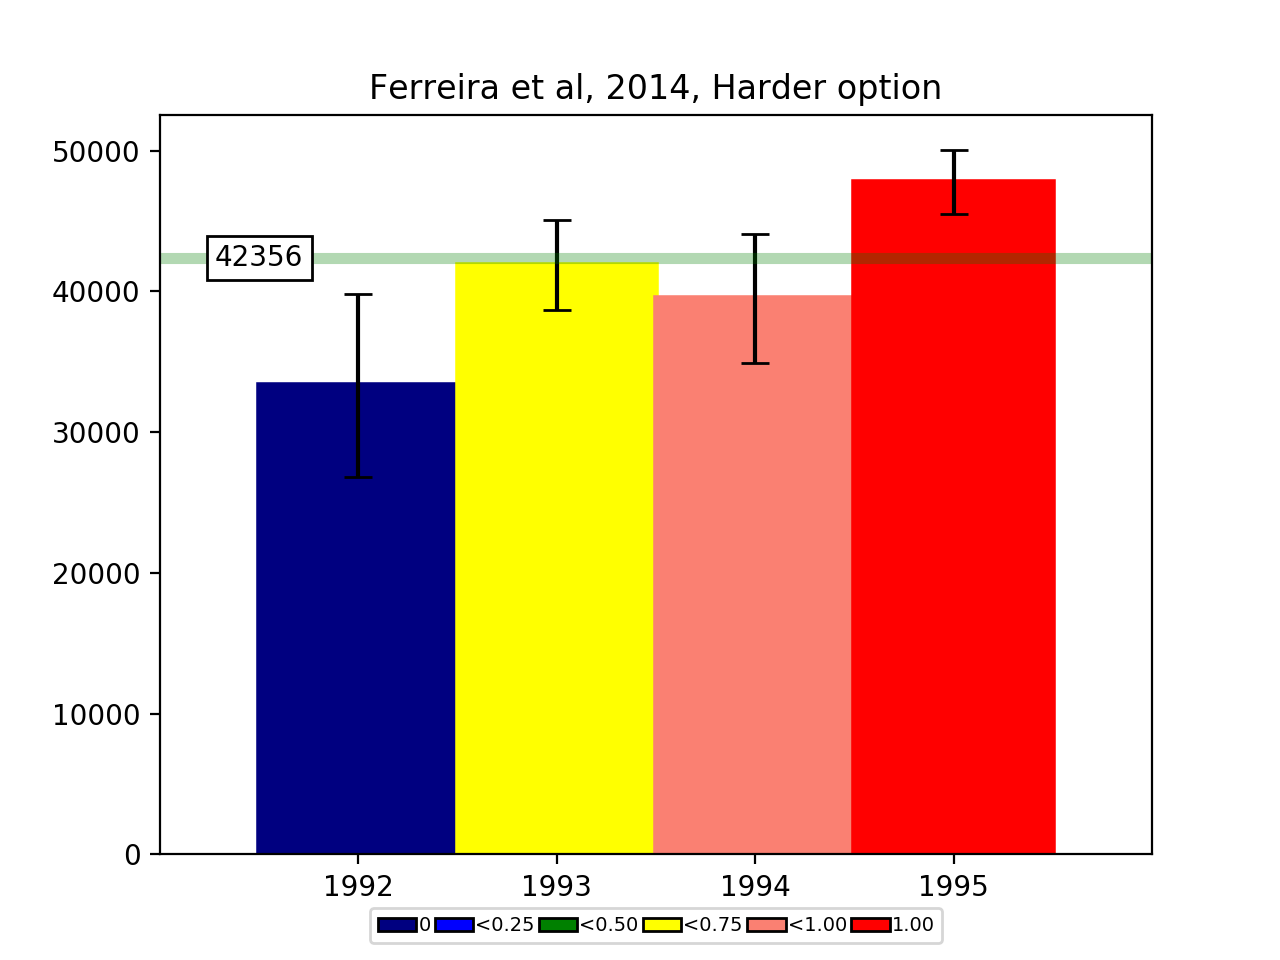

In [20]:
plt.figure()
barlist=plt.bar(xvals,bardata,width=1,yerr=y_r,linewidth=2,
                align='center',capsize=5)
barnumber=[]
def barindex():
    for index,bar in enumerate(barlist):
        barnumber.append(index)
    return barnumber
ans=barindex()
for i,j,z in zip(range(len(lower_ci)),range(len(upper_ci)),ans):
    
    if upper_ci[j]<float(value):
        barlist[z].set_color('navy')
    elif lower_ci[i]<=float(value)<=upper_ci[j]:
        if (float(value)-lower_ci[i])/(upper_ci[j]-lower_ci[i])<=0.25:
            barlist[z].set_color('blue')
        elif 0.25<(float(value)-lower_ci[i])/(upper_ci[j]-lower_ci[i])<=0.5:
            barlist[z].set_color('green')
        elif 0.5<(float(value)-lower_ci[i])/(upper_ci[j]-lower_ci[i])<=0.75:
            barlist[z].set_color('yellow')
        else:
            barlist[z].set_color('salmon')
    else:
        barlist[z].set_color('r')
#plt.setp(barlist,edgecolor='black')
plt.title('Ferreira et al, 2014, Harder option')
plt.axhline(y=float(value),color='green',linestyle='-',alpha=0.3,linewidth=4)
plt.text(-0.5,float(value),value,ha='center',va='center',bbox={'facecolor':'white','pad':3})

colorbardic=[('navy','0'),('blue','<0.25'),('green','<0.50'),('yellow','<0.75'),
             ('salmon','<1.00'),('red','1.00')]
bar_leg=[]
for k,v in colorbardic:
    p=Rectangle((0,0),1,1,fc=k,label=v,edgecolor='black')
    bar_leg.append(p)
plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.06),
          handles=bar_leg,ncol=len(bar_leg),columnspacing=0.2, handletextpad=0.1, fontsize=7)
plt.xlim([-1,xvals.size])
plt.xticks(xvals, df.columns)
plt.show()
plt.savefig('Assignment3_HarderOption.png')